# Named Entity Recognition

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\blake\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\blake\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\blake\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [9]:
sentence = ''' In this house the pom poms run wild and some times they cheer and drink beer! These are not your average pom poms.'''

tokenize_sent = nltk.word_tokenize(sentence)

tagged_sent = nltk.pos_tag(tokenize_sent)

tagged_sent[:3]

[('In', 'IN'), ('this', 'DT'), ('house', 'NN')]

In [10]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  this/DT
  house/NN
  the/DT
  pom/NN
  poms/NNS
  run/VBP
  wild/JJ
  and/CC
  some/DT
  times/NNS
  they/PRP
  cheer/VBP
  and/CC
  drink/VBP
  beer/NN
  !/.
  These/DT
  are/VBP
  not/RB
  your/PRP$
  average/JJ
  pom/JJ
  poms/NNS
  ./.)


# NER with NLTK
Tokenize article into sentences.<br>
Tokenize each sentence in sentences into words using a list comprehension.<br>
Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().<br>
Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). Along with pos_sentences, specify the additional keyword argument binary=True.<br>
Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.

In [11]:
# Tokenize the article into sentences: sentences
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'


In [12]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


# Charting

In [15]:
from collections import defaultdict 

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

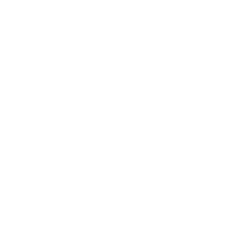

In [18]:
import matplotlib as plt
import matplotlib.pyplot as plt

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

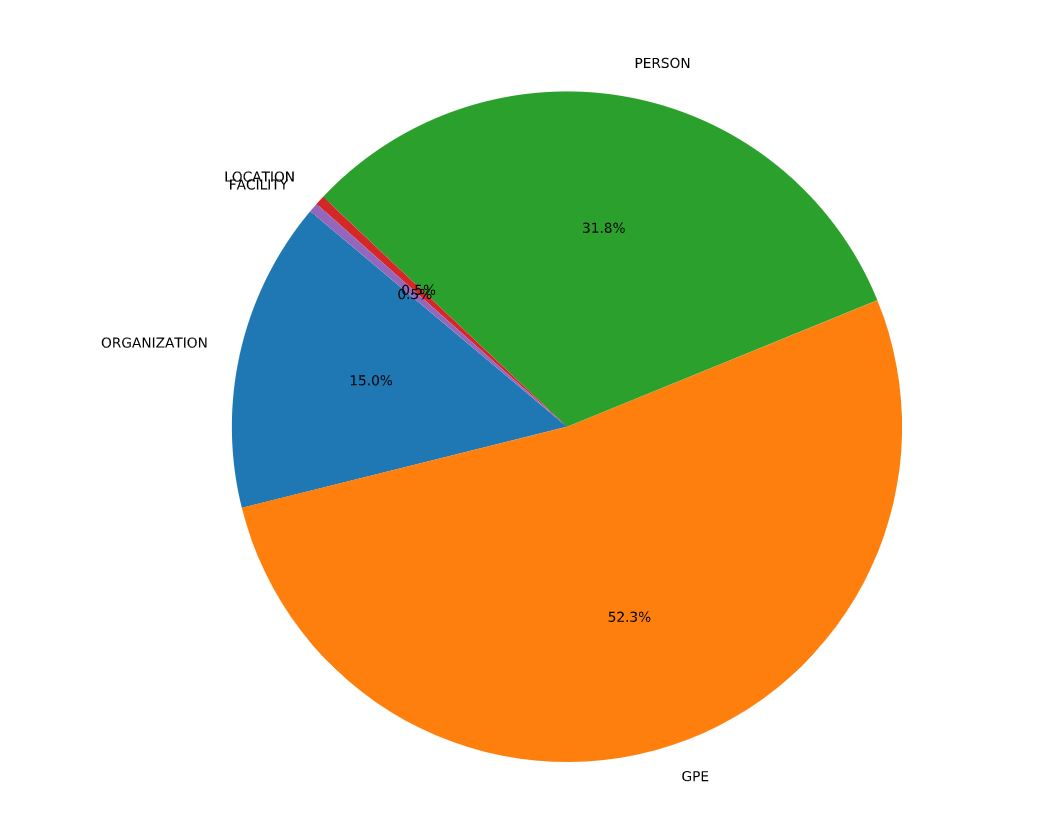

# SpaCy NER

In [26]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


   ORG Uber <br>
    ORG Uber <br>
    ORG Apple <br>
    ORG Uber <br>
    ORG Uber <br>
    PERSON Travis Kalanick <br>
    ORG Uber <br>
    PERSON Tim Cook<br>
    ORG Apple <br>
    CARDINAL Millions <br>
    ORG Uber<br>
    GPE drivers’ <br>
    LOC Silicon Valley’s <br>
    ORG Yahoo <br>
    PERSON Marissa Mayer <br>
    MONEY $186m



# French NER with polyglot I

In [ ]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))


 ['Charles', 'Cuvelliez']
    ['Charles', 'Cuvelliez']
    ['Bruxelles']
    ['l’IA']
    ['Julien', 'Maldonato']
    ['Deloitte']
    ['Ethiquement']
    ['l’IA']
    ['.']
    

In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

In [ ]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)
